In [1]:
import os, sys
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
#os.system('module load texlive/2022')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.size"  : 13
})

#rcParams.update({'font.size': 15})

#rcParams['mathtext.fontset'] = 'stix'
#plt.rc('text.latex', preamble=r'\usepackage{/global/cfs/cdirs/lsst/groups/WL/users/yomori/repo/nulltests_txpipe/apjfonts}')
        
#plt.rcParams["font.family"] = "Times New Roman"

plt.rcParams['axes.facecolor']   = 'w'
plt.rcParams['figure.facecolor'] = 'w'

kidscol = '#9CC363'    # light olive
descol  = 'chocolate'  # dark orange
hsccol  = '#5A8BAF'    # lightpurple
cmap=cm.seismic

# KiDS-1000

In [2]:
kids = h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/kids/kids1000_psf_catalog.h5')

In [3]:
kids['stars'].keys()

<KeysViewHDF5 ['calib_psf_reserved', 'calib_psf_used', 'dec', 'extendedness', 'fov_x', 'fov_y', 'measured_T', 'measured_T_n', 'measured_e1', 'measured_e2', 'model_T', 'model_e1', 'model_e2', 'ra']>

In [4]:
e1 = kids['stars/measured_e1'][:]
e2 = kids['stars/measured_e2'][:]
de1 = e1 - kids['stars/model_e1'][:]
de2 = e2 - kids['stars/model_e2'][:]
T = kids['stars/measured_T'][:]
dT = T - kids['stars/model_T'][:]
fov_x = kids['stars/fov_x'][:]
fov_y = kids['stars/fov_y'][:]

weights = [e1,e2, T, de1,de2, dT]

labels = [r'$e_{1, {\rm PSF}}$',r'$e_{2, {\rm PSF}}$',r'$T_{\rm PSF}$ [arcsec$^2$]',r'$\delta e_{1, {\rm PSF}}$',r'$\delta e_{2, {\rm PSF}}$', r'$\delta T_{\rm PSF}$ [arcsec$^2$]'] 

In [5]:
print('median:', round(np.median(T),3),'mean:',round(np.mean(T),3),'std:',round(np.std(T),3),'\n',round(np.mean(T)-np.std(T),3),round(np.mean(T)+np.std(T),3))
print('2sig:',round(np.mean(T)-2*np.std(T),3),round(np.mean(T)+2*np.std(T),3))

median: 0.179 mean: 0.181 std: 0.033 
 0.148 0.214
2sig: 0.115 0.246


In [6]:
Hnorm = []
for w in weights:
    Hw, _, _= np.histogram2d(fov_y, fov_x, bins=(100,100), weights=w)
    H, _, _= np.histogram2d(fov_y, fov_x, bins=(100,100))
    Hnorm.append(Hw/H)
    
Vmin = [-0.04, -0.04, 0.115, -0.01, -0.01, -0.01]
Vmax = [0.04, 0.04, 0.246, 0.01, 0.01, 0.01]

/tmp/ipykernel_305186/4279534873.py:5: RuntimeWarning: invalid value encountered in divide
  Hnorm.append(Hw/H)


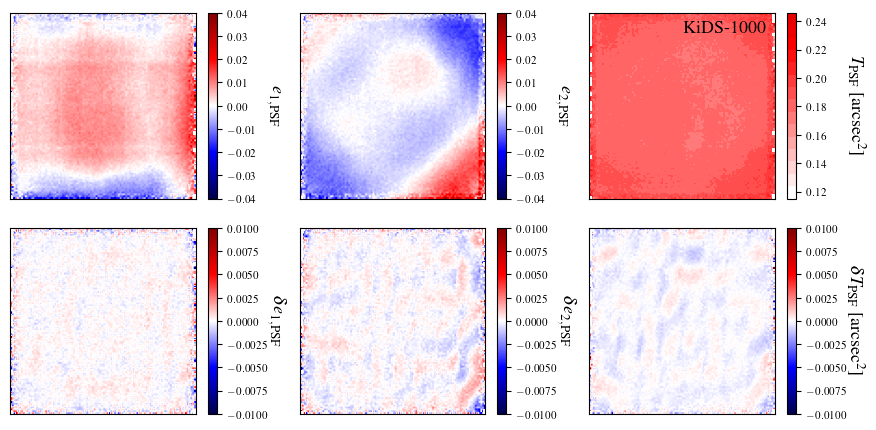

In [7]:
plt.figure(figsize=(9, 4.5))
for i in range(6):
    plt.subplot(2,3,i+1)
    
    halfcmap = cm.seismic(np.linspace(0.5, 0.8, cm.seismic.N // 2))
    cmapT = LinearSegmentedColormap.from_list('Upper Half', halfcmap,N=15)
    
    cmap = [cm.seismic,cm.seismic,cmapT,cm.seismic,cm.seismic,cm.seismic]
    im = plt.imshow(Hnorm[i],cmap=cmap[i], vmin=Vmin[i], vmax=Vmax[i])
    plt.xticks([])
    plt.yticks([])
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=8)
    pad = [20,20,30,15,15,15]
    cbar.ax.set_ylabel(labels[i], rotation=270,labelpad=pad[i])
    if i==2:
        plt.text(50,10,'KiDS-1000')
plt.tight_layout()
plt.savefig('psf_fov_kids.pdf',bbox_inches='tight')

# DES-Y3

In [8]:
des = h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y3/DES_psf_y3_catalog.hdf5','r')

In [9]:
des['stars'].keys()

<KeysViewHDF5 ['calib_psf_reserved', 'calib_psf_used', 'ccd', 'ccd_x', 'ccd_y', 'dec', 'extendedness', 'fov_x', 'fov_y', 'mag', 'measured_T', 'measured_e1', 'measured_e2', 'model_T', 'model_e1', 'model_e2', 'ra']>

In [10]:
e1 = des['stars/measured_e1'][:]
e2 = des['stars/measured_e2'][:]
de1 = e1 - des['stars/model_e1'][:]
de2 = e2 - des['stars/model_e2'][:]
T = des['stars/measured_T'][:]
dT = T - des['stars/model_T'][:]
fov_x = des['stars/fov_x'][:]
fov_y = des['stars/fov_y'][:]

weights = [e1,e2, T, de1,de2, dT]

labels = [r'$e_{1, {\rm PSF}}$',r'$e_{2, {\rm PSF}}$',r'$T_{\rm PSF}$ [arcsec$^2$]',r'$\delta e_{1, {\rm PSF}}$',r'$\delta e_{2, {\rm PSF}}$', r'$\delta T_{\rm PSF}$ [arcsec$^2$]'] 

In [11]:
print('median:', round(np.median(T),3),'mean:',round(np.mean(T),3),'std:',round(np.std(T),3),'\n',round(np.mean(T)-np.std(T),3),round(np.mean(T)+np.std(T),3))
print('2sig:',round(np.mean(T)-2*np.std(T),3),round(np.mean(T)+2*np.std(T),3))

median: 0.35 mean: 0.385 std: 0.143 
 0.242 0.528
2sig: 0.099 0.671


In [12]:
Hnorm = []
for w in weights:
    Hw, _, _= np.histogram2d(fov_x, fov_y, bins=(220,220), weights=w)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(220,220))
    Hnorm.append(Hw/H)
    
Vmin = [-0.04, -0.04, 0.1, -0.01, -0.01, -0.01]
Vmax = [0.04, 0.04, 0.67, 0.01, 0.01, 0.01]

/tmp/ipykernel_305186/1786214956.py:5: RuntimeWarning: invalid value encountered in divide
  Hnorm.append(Hw/H)


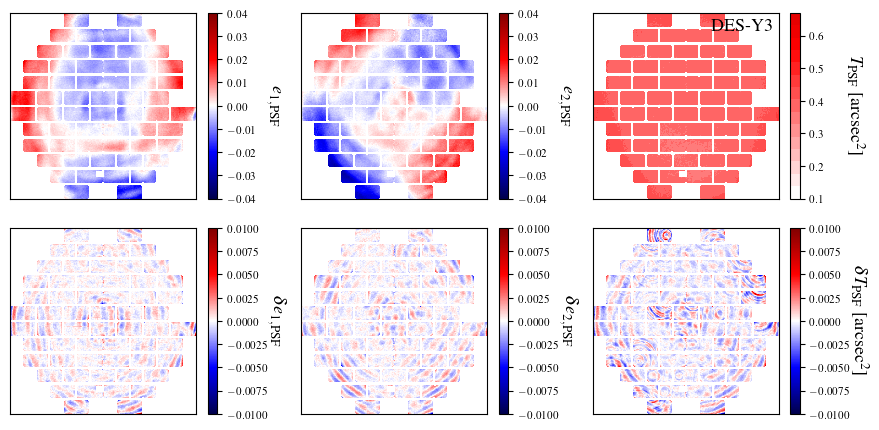

In [13]:
plt.figure(figsize=(9, 4.5))
for i in range(6):
    plt.subplot(2,3,i+1)
    cmapT = LinearSegmentedColormap.from_list('Upper Half', halfcmap,N=15)
    cmap = [cm.seismic,cm.seismic,cmapT,cm.seismic,cm.seismic,cm.seismic]
    im = plt.imshow(Hnorm[i],cmap=cmap[i], vmin=Vmin[i], vmax=Vmax[i])
    plt.xticks([])
    plt.yticks([])
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=8)
    cbar.ax.set_ylabel(labels[i], rotation=270,labelpad=pad[i])
    if i==2:
        plt.text(140,20,'DES-Y3')

plt.tight_layout()

plt.savefig('psf_fov_des.pdf',bbox_inches='tight')

##### 

# HSC-Y3

In [14]:
#dir_output = f'/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/hsc-y3/shear/SRC/{obsid}/HSC-I/output'


e1=[]
e2=[]

de1=[]
de2=[]
T=[]
dT=[]
fov_x=[]
fov_y=[]


c=0
toth=0
for i in (['00814','00817','01116','00995','01057','01062','01236','01296','01297','01318','02001','01944','01943','01942','01915','01891','01889','01882','01859','01858','01849','01828','01794','01790','01709','01703']):
    d=np.load(f'/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/hsc-y3/shear/SRC/merged_coords_ra_ccdxy_%s.npz'%i)
    #plt.figure(figsize=(5,5))
    #h=plt.hist2d(d['fpx'],d['fpy'],bins=np.linspace(-270,270,100),weights=d['T_meas'],cmap='RdBu');
    #toth+=h[0]
    #c+=1
    
    e1    += (d['e1_meas']).tolist() #des['stars/measured_e1'][:]
    e2    += (-d['e2_meas']).tolist()#des['stars/measured_e2'][:]
    #e1m   += (d['e1_mod']).tolist()
    #e2m   += (d['e2_mod']).tolist()
    de1   += (d['e1_meas'] - d['e1_mod']).tolist()
    de2   += (-d['e2_meas'] + d['e2_mod']).tolist()
    T     += (d['T_meas']).tolist() #des['stars/measured_T'][:]
    dT    += (d['T_meas'] - d['T_mod'][:]).tolist()
    fov_x += (d['fpx']).tolist()#des['stars/fov_x'][:]
    fov_y += (d['fpy']*-1).tolist()#des['stars/fov_y'][:]

weights = [np.array(e1),np.array(e2), np.array(T), np.array(de1),np.array(de2), np.array(dT) ]

labels = [r'$e_{1, {\rm PSF}}$',r'$e_{2, {\rm PSF}}$',r'$T_{\rm PSF}$ [arcsec$^2$]',r'$\delta e_{1, {\rm PSF}}$',r'$\delta e_{2, {\rm PSF}}$', r'$\delta T_{\rm PSF}$ [arcsec$^2$]'] 

In [15]:
print('median:', round(np.median(T),3),'mean:',round(np.mean(T),3),'std:',round(np.std(T),3),'\n',round(np.mean(T)-np.std(T),3),round(np.mean(T)+np.std(T),3))
print('2sig:',round(np.mean(T)-2*np.std(T),3),round(np.mean(T)+2*np.std(T),3))

median: 0.113 mean: 0.118 std: 0.03 
 0.089 0.148
2sig: 0.059 0.178


In [16]:

Hnorm = []
for w in weights:
    Hw, _, _= np.histogram2d(fov_x, fov_y, bins=(150,150), weights=w)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(150,150))
    Hnorm.append(Hw/H)
    
Vmin = [-0.04, -0.04, 0.06, -0.01, -0.01, -0.01]
Vmax = [0.04, 0.04, 0.18, 0.01, 0.01, 0.01]

/tmp/ipykernel_305186/1861481693.py:5: RuntimeWarning: invalid value encountered in divide
  Hnorm.append(Hw/H)


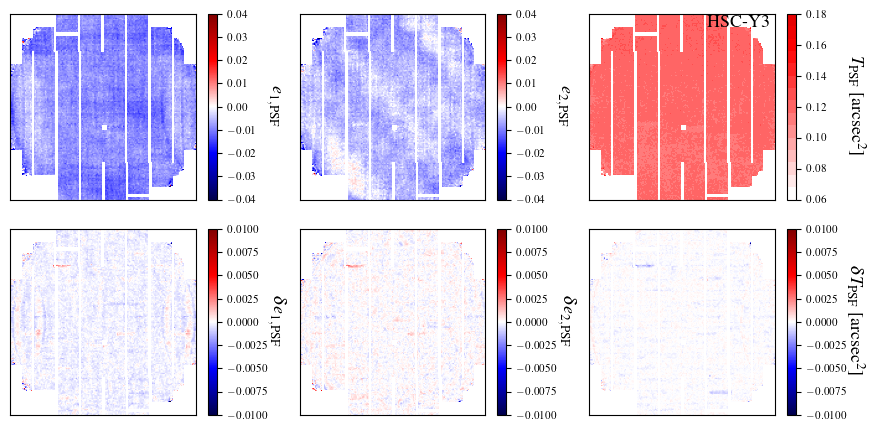

In [17]:
plt.figure(figsize=(9, 4.5))
for i in range(6):
    plt.subplot(2,3,i+1)
    cmapT = LinearSegmentedColormap.from_list('Upper Half', halfcmap,N=15)
    cmap = [cm.seismic,cm.seismic,cmapT,cm.seismic,cm.seismic,cm.seismic]
    
    im = plt.imshow(Hnorm[i],cmap=cmap[i], vmin=Vmin[i], vmax=Vmax[i])
    plt.xticks([])
    plt.yticks([])
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=8)
    cbar.ax.set_ylabel(labels[i], rotation=270,labelpad=pad[i])
    if i==2:
        plt.text(95,10,'HSC-Y3')

plt.tight_layout()
plt.savefig('psf_fov_hsc.pdf',bbox_inches='tight')

# Pixel scales $\rightarrow$ angular scales 
DES: 0.263"/pixel <BR>
HSC: 0.168"/pixel <BR>
KiDS: 0.214"/pixel <BR>

Lets make these figures in terms of angular scales instead of pixel number:
DES has the lowest resolution so match it to that.

(100px) x (0.263 arcsec/px) = 26.3 arcsec <BR> 

for KiDS: 26.3arcsec/(0.214 arcsec/px)= 123 <BR>
for HSC: 26.3arcsec/(0.168 arcsec/px) = 156 <BR>

# Focal plane size (degrees):

KiDS: 1 <BR>
DES: 2.2 <BR>
HSC: 1.5 <BR>

# Sky orientation 

KiDS: <BR>
https://www.eso.org/observing/dfo/quality/OMEGACAM/img/ocam_field_geometryA.png <br>
https://www.researchgate.net/publication/237417666_OmegaCAM_the_16k_16k_Survey_Camera_for_the_VLT_Survey_Telescope <br>

DES: <br>
https://www.darkenergysurvey.org/wp-content/uploads/2018/01/ImageProcessing.pdf <br>
https://noirlab.edu/science/programs/ctio/instruments/Dark-Energy-Camera/characteristics <br>
https://data.darkenergysurvey.org/aux/releasenotes/DESDMrelease.html <br>

HSC: <br>
https://hsc.mtk.nao.ac.jp/pipedoc/pipedoc_6_e/_images/CCDPosition_20170212.png <br>
https://subarutelescope.org//Observing/Instruments/HSC/ccd.html <br>
